<a href="https://colab.research.google.com/github/JamorMoussa/PFA-/blob/main/scripts/Sentiment_analysis_Youtube_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from wordcloud import WordCloud

In [5]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [8]:
df = pd.read_csv('/content/All_Dataset.csv')

In [9]:
df.head()

,Unnamed: 0.1,Unnamed: 0,videoId,authorChannelId,authorDisplayName,textDisplay,textOriginal,publishedAt,updatedAt,likeCount,canReply,totalReplyCount
0,0,0,1WPFLWEVGAI,UCeVUBvNPwGu0k-V2I6xohbA,Danielle,I’m sorry but all I could hear are “South Park...,I’m sorry but all I could hear are “South Park...,2023-05-07T21:51:24Z,2023-05-07T21:51:24Z,0,True,0
1,1,1,1WPFLWEVGAI,UCI_e2Toha8LafCoKHiHINAg,Bakn Pancakes,I am taking a course on Chat GPT that is only ...,I am taking a course on Chat GPT that is only ...,2023-05-07T15:35:17Z,2023-05-07T15:35:26Z,1,True,0
2,2,2,1WPFLWEVGAI,UCQISiIN9C3tFdR87K85kDRA,DigIn21,Unless chat gpt learns to grow a physical body...,Unless chat gpt learns to grow a physical body...,2023-05-07T14:23:32Z,2023-05-07T14:23:32Z,0,True,0
3,3,3,1WPFLWEVGAI,UCJTgmGorCZq0PQR9x5Og6tg,David Lowe,The Chatgpt and Bard computer programs are ove...,The Chatgpt and Bard computer programs are ove...,2023-05-07T11:57:40Z,2023-05-07T11:57:40Z,0,True,0
4,4,4,1WPFLWEVGAI,UCZFDO1ITBbcjDeJr62RT5sw,BatMartoo,Interesting how Companies seek a.i. to only re...,Interesting how Companies seek a.i. to only re...,2023-05-07T11:52:30Z,2023-05-07T11:52:30Z,1,True,0


In [44]:
comments = df.head(100)[['textOriginal',]]

In [45]:
comments = comments.rename(columns={'textOriginal':'comment'})

In [60]:
sentement_words = ['Very negative','Negative','Neutral','Positive','Very positive']

def get_sentement(comment):

  tokens = tokenizer.encode(comment, return_tensors='pt')
  result = model(tokens)
  res = sentement_words[int(torch.argmax(result.logits))]
  return res 

In [61]:
comments['sentement'] = comments['comment'].apply(lambda x : get_sentement(x))

In [62]:
comments

,comment,sentement
0,I’m sorry but all I could hear are “South Park...,Very negative
1,I am taking a course on Chat GPT that is only ...,Positive
2,Unless chat gpt learns to grow a physical body...,Very positive
3,The Chatgpt and Bard computer programs are ove...,Negative
4,Interesting how Companies seek a.i. to only re...,Positive
...,...,...
95,It will fail!!!!!!👎🏾👎🏾👎🏾👎🏾,Very negative
96,The end of the history will come when ChatGPT ...,Very positive
97,Some people are definitely more replaceable th...,Negative
98,AI isn’t the same as other “new”tech in the pa...,Neutral


In [63]:
counts_sentement = dict(comments['sentement'].value_counts())

In [64]:
labels = list(counts_sentement.keys())
sizes = list(counts_sentement.values())

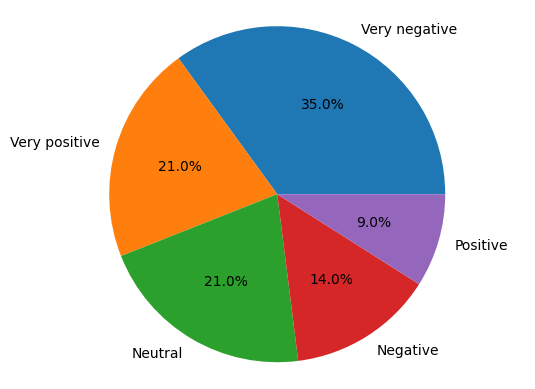

In [65]:
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [67]:
comments_text = ' '.join(comments['comment'].astype(str))

In [75]:
word_cloud = WordCloud(width=800, height=400, background_color='white').generate(comments_text)

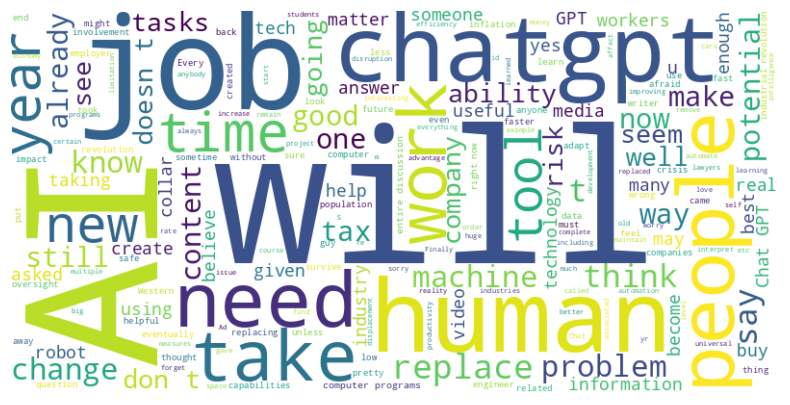

In [77]:
plt.figure(figsize=(10, 5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()